In [4]:
'''
Calculate signal yield and plot electron recoil histogram from QEDark code
Author: Christina Wang 
Date: March 23 2023

'''

# plot limits digitized from paper 1607.01009
import ROOT as rt
import sys
import numpy as np

sys.path.append('/storage/af/user/christiw/login-1/christiw/DM/SNSPD_GaAs_limit/lib/')
sys.path.append('/storage/af/user/christiw/login-1/christiw/DM/SNSPD_GaAs_limit/GaAs_QEDark/')


from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph
import dm_rates
from dm_rates import read_f2, d_rate, rate


10000000.0_0 42766.090883116856 42766.090883116856 42766.09088311684
10000000.0_2 8187.5585454057755 8187.558545405775 8187.558545405773
1000000000.0_0 2344.913625957299 2361.702029946763 2361.8232048879486
1000000000.0_2 148.1294192982914 148.13369523191147 148.13372650758208


Warning in <TCanvas::Constructor>: Deleting canvas with same name: 
Warning in <TROOT::Append>: Replacing existing TH1: 10000000.0_0 (Potential memory leak).
Warning in <TH1D::Rebin>: ngroup=10 is not an exact divider of nbins=499.
Warning in <TROOT::Append>: Replacing existing TH1: 10000000.0_2 (Potential memory leak).
Warning in <TH1D::Rebin>: ngroup=10 is not an exact divider of nbins=499.
Warning in <TROOT::Append>: Replacing existing TH1: 1000000000.0_0 (Potential memory leak).
Warning in <TH1D::Rebin>: ngroup=10 is not an exact divider of nbins=499.
Warning in <TROOT::Append>: Replacing existing TH1: 1000000000.0_2 (Potential memory leak).
Warning in <TH1D::Rebin>: ngroup=10 is not an exact divider of nbins=499.


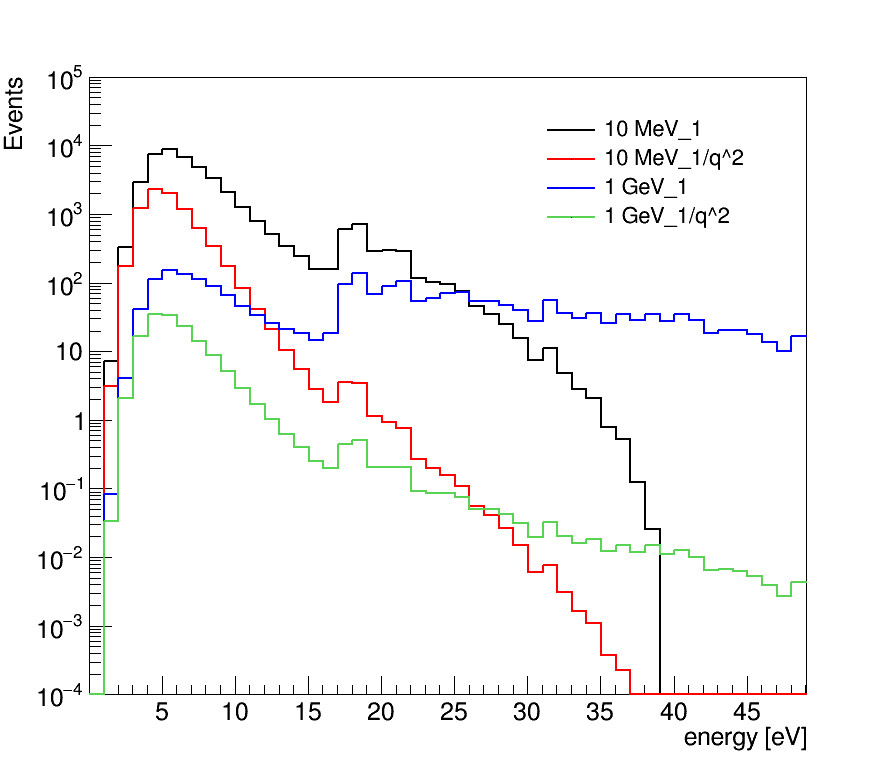

In [6]:
f2 = read_f2('../GaAs_QEDark/QEDark_GaAs_k8_100Ryd.npy')
h = {}
rt.gStyle.SetOptStat(0)
leg = rt.TLegend(0.6,0.7,0.9,0.85)
leg.SetBorderSize(0)
c = rt.TCanvas('','',900,800)
ph_num = {}
i = 0
name = ['10 MeV', '1 GeV']
fdm_name = ['1', '1/q^2']

for l, mX in enumerate([1e7, 1e9]):
    for n, fdm in enumerate([0,2]):
        k = '{}_{}'.format(mX, fdm)
        E, dR = d_rate(mX, f2, fdm)
        h[k] = create_TH1D( np.ones(1), axis_title=['energy [eV]', 'Events'], name=k, binning=E)
        for j in range(h[k].GetNbinsX()):
            h[k].SetBinContent(j+1, dR[j])
        h[k].SetTitle('')
        h[k].SetMaximum(1e5)
        h[k].SetMinimum(1e-4)
        h[k].GetXaxis().SetRangeUser(1.5,51.5)
        h[k].GetXaxis().SetLimits(1.5,51.5)
        h[k].SetLineColor(std_color_list[i])
        h[k].SetLineWidth(2)
        
        # rebin to make the binning 1 eV
        h[k].Rebin(10) 
        h[k].Scale(1./10)
        h[k].SetMaximum(1e5)
        h[k].SetMinimum(1e-4)
        leg.AddEntry(h[k],'{}_{}'.format(name[l], fdm_name[n]))
        h[k].Draw("same hist")
        i+= 1
        print(k, h[k].Integral(), rate(mX, f2, fdm), np.sum(dR)*dm_rates.dE)

leg.Draw()
c.SetLogy()
c.Draw()